<a href="https://colab.research.google.com/github/Pianomello/Summer-camp-2024/blob/main/Exoplanet_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b> Machine Learning in Astronomy : Exoplanet Prediction

<iframe width="560" height="315" src="https://www.youtube.com/embed/xNeRqbw18Jk" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


<h2> Step 1: Setup

<h3><u> Importing useful libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

<h3><u> Loading data

In [ ]:
train_data = pd.read_csv('exoTrain.csv')
test_data = pd.read_csv('exoTest.csv')
train_data.head(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


<h2> Step 2: Data Analysis


| **Feature**                              | **Description**                                                                                                                                                                                                                      |
|------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Label**                          |  2 is an exoplanet star and 1 is a non-exoplanet-star.                                                                                                                                                                                             |
| **FLUX1-FLUX3197**                          | The light intensity recorded for each star, at a different point in time.                                                                                    |



In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 13.9 MB


<h3><u> Checking missing values

In [ ]:
missing_data_train = train_data.isnull().sum()
missing_data_test = test_data.isnull().sum()

<h3><u> Checking duplicate values

In [ ]:
duplicate_data = train_data[train_data.duplicated()]
duplicate_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


In [ ]:
train_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [ ]:
train_data['LABEL'] = [1 if value == 2 else 0 for value in train_data['LABEL']]
test_data['LABEL'] = [1 if value == 2 else 0 for value in test_data['LABEL']]

<Axes: title={'center': 'Exoplanet Count'}, xlabel='LABEL', ylabel='count'>

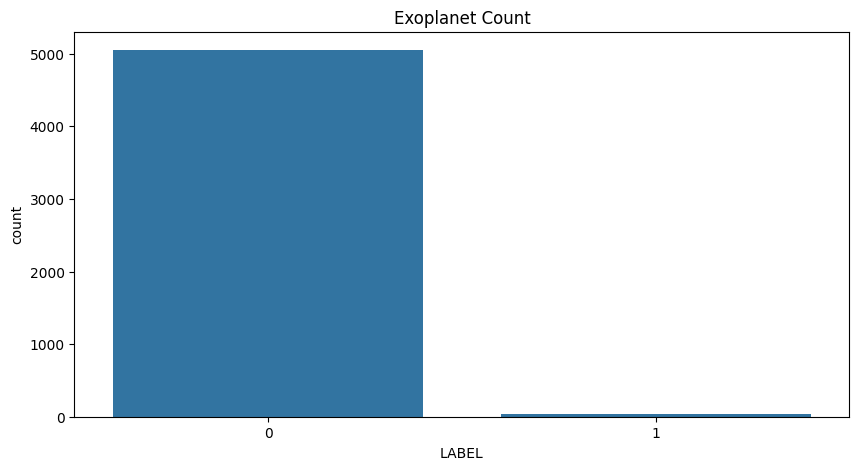

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Exoplanet Count')
sns.countplot(data=train_data, x ='LABEL')

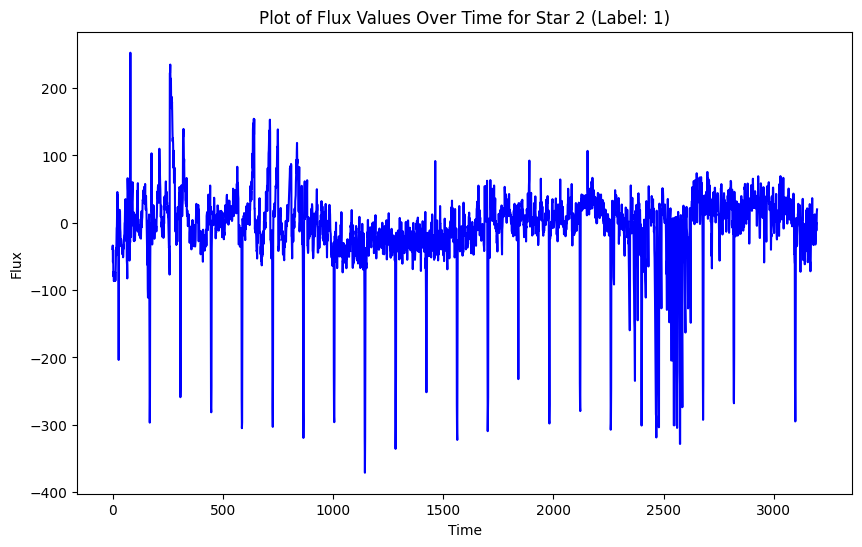

In [ ]:
index = 1  # Change this index to select a different star
label = train_data.iloc[index, 0]
flux_values = train_data.iloc[index, 1:]
time = range(len(flux_values))

plt.figure(figsize=(10, 6))
plt.plot(time, flux_values, color='blue')
plt.title(f'Plot of Flux Values Over Time for Star {index + 1} (Label: {label})')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()

In [ ]:
X_train = train_data.drop(columns='LABEL')
y_train = train_data['LABEL']
X_test = test_data.drop(columns='LABEL')
y_test = test_data['LABEL']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=4)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Columns: 3197 entries, FLUX.1 to FLUX.3197
dtypes: float64(3197)
memory usage: 246.4 MB


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_scaled,y_train)
y_pred1 = model1.predict(X_test_scaled)
model1_accuracy = model1.score(X_test_scaled,y_test)
print(model1_accuracy)

0.9614035087719298


In [ ]:
model2 = DecisionTreeClassifier(random_state=0)
model2.fit(X_train_scaled,y_train)
y_pred2 = model2.predict(X_test_scaled)
model2_accuracy = model2.score(X_test_scaled,y_test)
print(model2_accuracy)

0.9701754385964912


In [ ]:
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train_scaled,y_train)
y_pred3 = model3.predict(X_test_scaled)
model3_accuracy = model3.score(X_test_scaled,y_test)
print(model3_accuracy)

0.9912280701754386


In [ ]:
!pip install dtreeviz

In [ ]:
import dtreeviz
feature_list = X_train.columns
viz = dtreeviz.model(
    model2,X_train_scaled,y_train,target_name='Exoplanet', feature_names= feature_list, class_names=['Not Exoplanet','Exoplanet']
)


In [ ]:
viz.view()

c:\Users\aryan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
